In [131]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [132]:
x_train = np.array([1.0,2.0]) #the train set built with numpy
y_train = np.array([300.0,500.0])
print(f'x_train: {x_train} and x_train shape: {x_train.shape}')
print(f'y_train: {y_train} and y_train shape: {y_train.shape}')
m = x_train.shape[0] #m is the number of training examples
print(f'number of training examples: m = {m}')

x_train: [1. 2.] and x_train shape: (2,)
y_train: [300. 500.] and y_train shape: (2,)
number of training examples: m = 2


Model function
f(x) = w *x +b

In [133]:
def compute_cost(x,y,w,b): #compute the cost function for linear regression

    m = x.shape[0]

    cost_sum= 0

    for i in range(m):
        f_wb = w * x[i] +b
        cost = (f_wb - y[i])**2 #error
        cost_sum +=cost #suma total

    total_cost = (1/(2*m)) * cost_sum

    return total_cost

Derivada parcial de la cost function

w = w-alpha d/dw J(w,b)

b= b-alpha d/db J(w,b)

siendo alpha el learning rate y J(w,b) la cost function

In [134]:
def compute_gradient(x,y,w,b):
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):

        f_wb = w *x[i] +b #funcion

        dj_dw_i = (f_wb - y[i] ) *x[i] #derivada de w para cada valor dado de i
        dj_db_i = f_wb - y[i]    # derivada de b para cada valor dado de i
        dj_dw += dj_dw_i  #suma derivadas totales de w
        dj_db += dj_db_i  #suma derivadas totales de b

    dj_dw = dj_dw/ m #divido por m para completar la formula
    dj_db = dj_db / m

    return dj_dw , dj_db


In [135]:
print(x_train)
print(y_train)

[1. 2.]
[300. 500.]


In [136]:
prueba = compute_gradient(x_train,y_train,100,100)

prueba

(-250.0, -150.0)

In [137]:
def gradient_descendent(x,y, w_in ,b_in, alpha, num_iters, cost_function, gradient_function):

    J_history = [] # history of cost values
    p_history = [] # history of parameters [w,b]
    w = w_in
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x,y,w,b)

        w = w - alpha * dj_dw #alpha learning rate
        b = b - alpha * dj_db


        J_history.append(cost_function(x,y,w,b))

        p_history.append([w,b])

        if i % math.ceil(num_iters/10) == 0:
            print(f'Iteration {i:4}: Cost {J_history[-1]:0.2e}',
                  f'dj_dw: {dj_dw:0.3e},dj_db: {dj_db: 0.3e}',
                  f'w: {w:0.3e},b:{b:0.5e}')
            
    return w,b, J_history,p_history


In [138]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha= 1.0e-2

w_final,b_final, J_hist, p_hist = gradient_descendent(x_train,y_train,w_init,b_init,tmp_alpha,
                                                      iterations, compute_cost, compute_gradient)

print(f'(w,b) found by gradient descendent: ({w_final:8.4f},{b_final:8.4f})')

Iteration    0: Cost 7.93e+04 dj_dw: -6.500e+02,dj_db: -4.000e+02 w: 6.500e+00,b:4.00000e+00
Iteration 1000: Cost 3.41e+00 dj_dw: -3.712e-01,dj_db:  6.007e-01 w: 1.949e+02,b:1.08228e+02
Iteration 2000: Cost 7.93e-01 dj_dw: -1.789e-01,dj_db:  2.895e-01 w: 1.975e+02,b:1.03966e+02
Iteration 3000: Cost 1.84e-01 dj_dw: -8.625e-02,dj_db:  1.396e-01 w: 1.988e+02,b:1.01912e+02
Iteration 4000: Cost 4.28e-02 dj_dw: -4.158e-02,dj_db:  6.727e-02 w: 1.994e+02,b:1.00922e+02
Iteration 5000: Cost 9.95e-03 dj_dw: -2.004e-02,dj_db:  3.243e-02 w: 1.997e+02,b:1.00444e+02
Iteration 6000: Cost 2.31e-03 dj_dw: -9.660e-03,dj_db:  1.563e-02 w: 1.999e+02,b:1.00214e+02
Iteration 7000: Cost 5.37e-04 dj_dw: -4.657e-03,dj_db:  7.535e-03 w: 1.999e+02,b:1.00103e+02
Iteration 8000: Cost 1.25e-04 dj_dw: -2.245e-03,dj_db:  3.632e-03 w: 2.000e+02,b:1.00050e+02
Iteration 9000: Cost 2.90e-05 dj_dw: -1.082e-03,dj_db:  1.751e-03 w: 2.000e+02,b:1.00024e+02
(w,b) found by gradient descendent: (199.9929,100.0116)


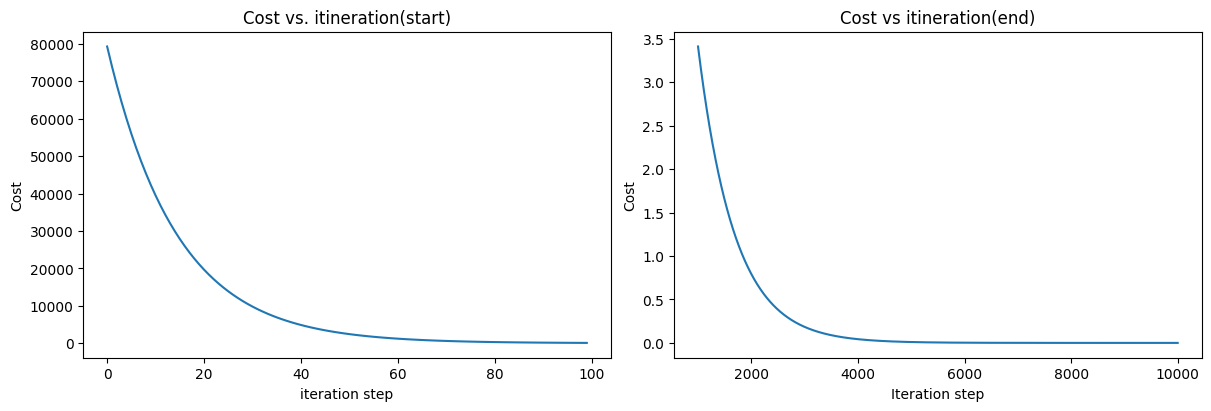

In [140]:
fig, (ax1, ax2) = plt.subplots(1,2,constrained_layout=True,figsize= (12,4))

ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])

ax1.set_title('Cost vs. itineration(start)') ; ax2.set_title('Cost vs itineration(end)')
ax1.set_ylabel('Cost')  ; ax2.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')  ; ax2.set_xlabel('Itireation step')
ax1.set_xlabel('iteration step')  ; ax2.set_xlabel('Iteration step')
plt.show()


Predicciones

In [148]:
m = x_train.shape[0]

predicted =np.zeros(m)

for i in range(m):
    predicted[i] = w_final * x_train[i] + b_final

In [146]:
predicted

array([300., 500.])

Text(0, 0.5, 'variable independiente')

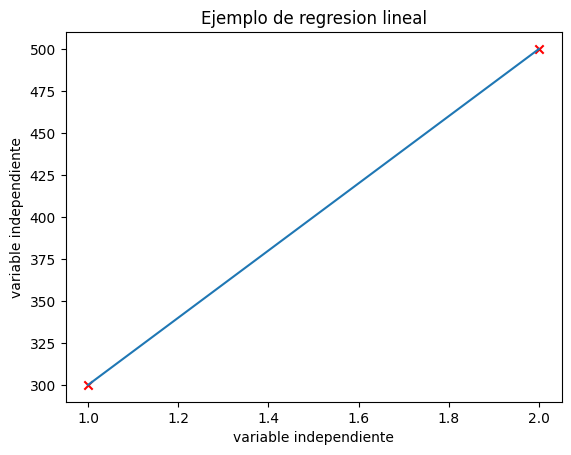

In [151]:
plt.plot(x_train,predicted)
plt.scatter(x_train,y_train,marker='x',c='r')

plt.title('Ejemplo de regresion lineal')
plt.xlabel('variable independiente')
plt.ylabel('variable independiente')